<a href="https://colab.research.google.com/github/KaylumCassidy/CA/blob/main/CABSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA BIG DATA CONCEPTS CA

## Data Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
% matplotlib inline

fifa = pd.read_csv('fifa.csv', index_col = 0)
print(fifa)

name = fifa[' name']
rating = fifa[' rating']
position = fifa[' position']
height = fifa[' height']
foot = fifa[' foot']
pace = fifa[' pace']
shooting = fifa[' shooting']
passing = fifa[' passing']
heading = fifa[' heading']
diving = fifa[' diving']
handing = fifa[' handling']
kicking = fifa[' kicking']
reflexes = fifa[' reflexes']
speed = fifa[' speed']
positioning = fifa[' positioning']

                           name   rating  position   height    foot   rare  \
id                                                                           
1001               Gábor Király       69        GK      191   Right      0   
100143             Frederik Boi       65         M      184   Right      0   
100264          Tomasz Szewczuk       57         A      185   Right      0   
100325   Steeve Joseph-Reinette       63         D      180    Left      0   
100326             Kamel Chafni       72         M      181   Right      0   
...                         ...      ...       ...      ...     ...    ...   
9801            Danijel Ljuboja       73         A      189    Left      1   
9805              Craig Bellamy       79         A      175   Right      0   
9807              Michel Breuer       68         D      183   Right      0   
9815                Gill Swerts       65         D      179   Right      0   
9913                Mehdi Nafti       69         M      179   Ri

In [3]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,classification_report



In [35]:
def make_distplot(fifa,title):
    fig,ax=plt.subplots(figsize=(10,5))
    ax.set_title(title)
    sns.distplot(fifa,bins=30)
    
def horizontal_bar(data,x,y,title):
    fig,ax=plt.subplots(figsize=(10,5))
    sns.barplot(data=data,x=x,y=y,color='steelblue')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)
    

def cat_to_dummies(fifa):
    dummies_fifa=pd.get_dummies(fifa,drop_first=True)
    return dummies_fifa

def concat_data(fifa,dummies_fifa):
    fifa=pd.concat([fifa,dummies_fifa],axis=1)
    return fifa

def pos_group(fifa):
    goalkeeper=[' GK']
    centreback=[' D']
    midfielder=[' M']
    striker=[' A']
    
    if fifa in goalkeeper:
        fifa='goalkeeper'

    elif fifa in centreback:
        fifa='centreback'

    elif fifa in midfielder:
        fifa='midfielder'
    else:
        fifa='striker'
    
    return fifa

def line_them(data=fifa, col=' rating', groupby=' height'):
    x = df.groupby(groupby)[col].mean()
    plt.figure(figsize=(13,7))
    plt.title("{0} Over {1}".format(col, groupby))
    plt.plot(x, color='dodgerblue')
    plt.xlabel(groupby)
    plt.ylabel(col)


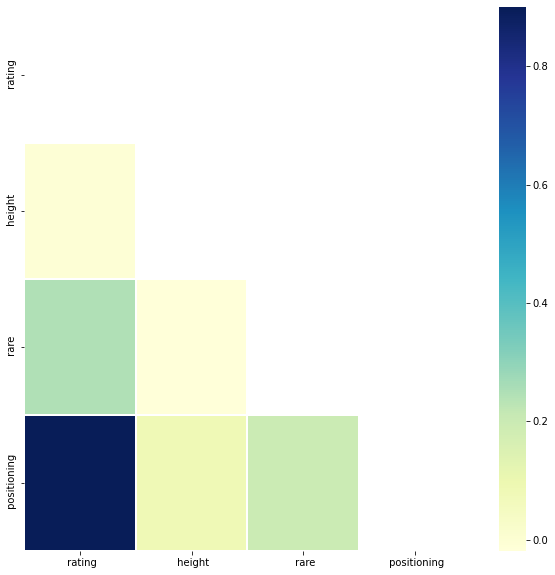

In [5]:
plt.figure(figsize=(10,10))
mask=np.triu(np.ones_like(fifa.corr()))
sns.heatmap(fifa.corr(),mask=mask,linewidth=1,cmap='YlGnBu')

In [13]:
fifa.head()

,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
id,,,,,,,,,,,,,,,,,,
1001,Gábor Király,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN
100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,,,,,,NaN
100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,,,,,,NaN
100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,,,,,,NaN


In [14]:
fifa.columns

Index([' name', ' rating', ' position', ' height', ' foot', ' rare', ' pace',
       ' shooting', ' passing', ' dribbling', ' defending', ' heading',
       ' diving', ' handling', ' kicking', ' reflexes', ' speed',
       ' positioning'],
      dtype='object')

## Question 1 does height effect rating?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


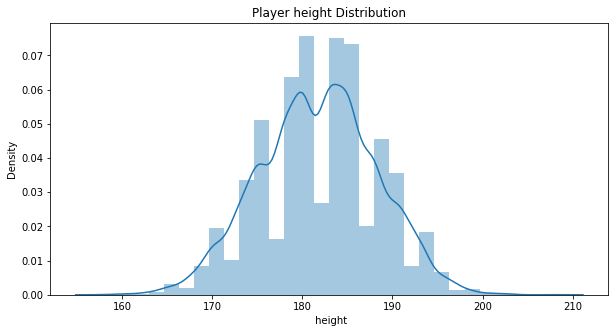

In [15]:
make_distplot(fifa[' height'],'Player height Distribution') 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


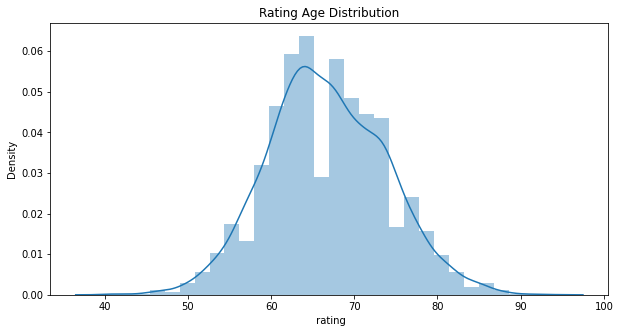

In [16]:
make_distplot(fifa[' rating'],'Rating Age Distribution')

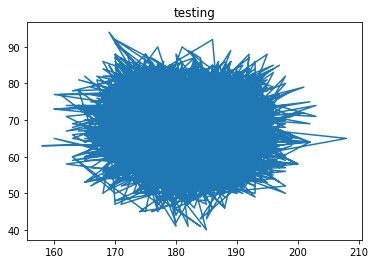

In [17]:
import numpy as np
from matplotlib import pyplot as plt

ys = rating
x = height

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.4)

plt.title("testing")
plt.show()

In [5]:
#Now lets try and make this more easy to view and nicer

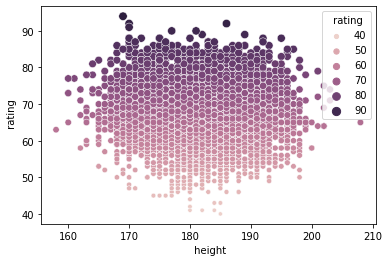

In [18]:
import seaborn as sns
sns.scatterplot(x=" height", y=" rating", 
                hue=" rating",size=" rating", data=fifa)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


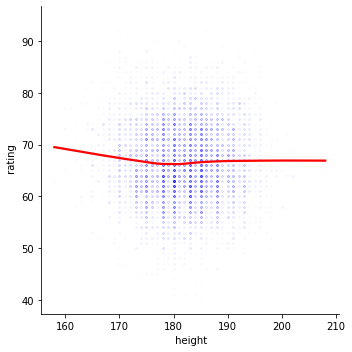

In [23]:
sns.lmplot(data = fifa, x = ' height', y = ' rating',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'blue'}, 
           line_kws={'color':'red'})

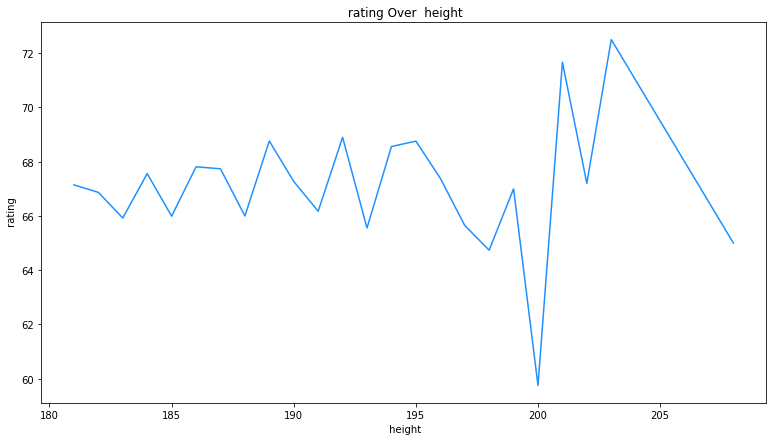

In [32]:
df = fifa[fifa[' height']>180].copy()
line_them(data=df, col=' rating', groupby=' height')

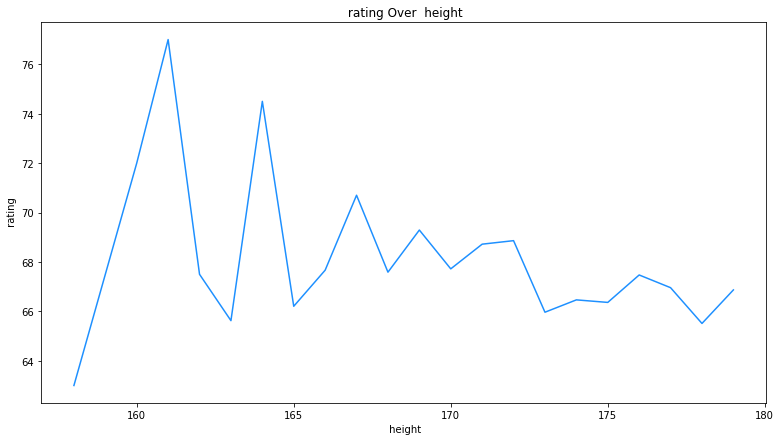

In [34]:
df = fifa[fifa[' height']<180].copy()
line_them(data=df, col=' rating', groupby=' height')

Does any foot have a effecr on this 





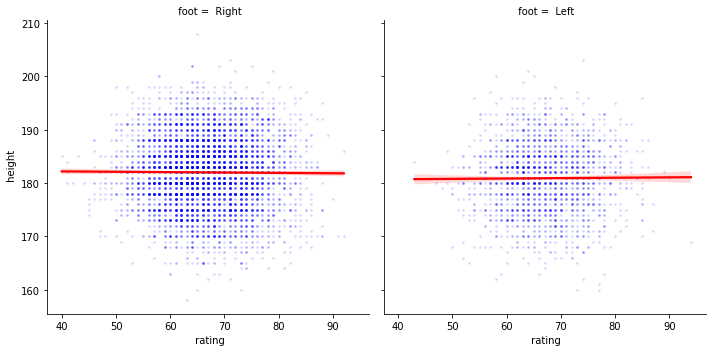

In [61]:
sns.lmplot(data=fifa,x=' rating',y= ' height',col=' foot',
          scatter_kws={'alpha':0.1,'s':3,'color':'blue'},line_kws={'color':'red'})

## Question 2 Top player by using rating 

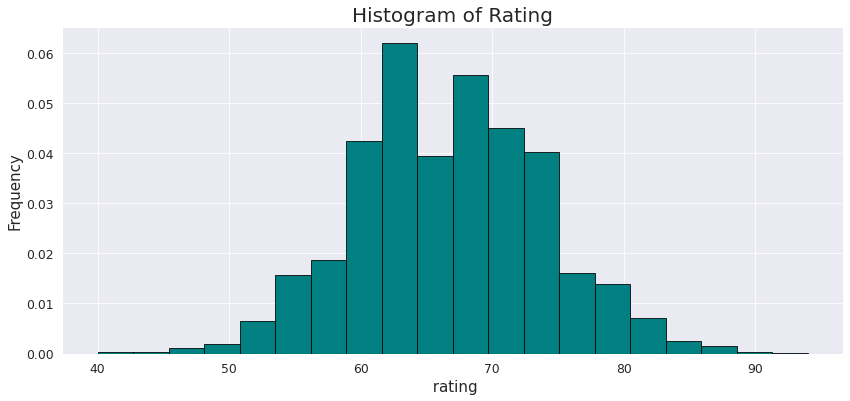

In [84]:
plt.figure(figsize=(14,6))
plt.hist(fifa[" rating"],bins=20,density=True,color="teal",edgecolor="black")
plt.xlabel(" rating",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Histogram of Rating",fontsize=20)
plt.show()


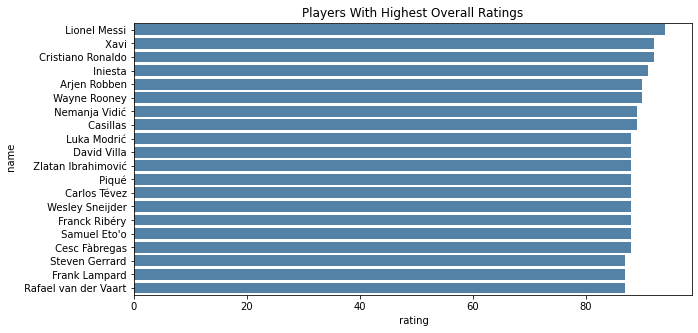

In [28]:
high_player_ovr=fifa[[' name',' rating']].sort_values(by=' rating',ascending=False).reset_index(drop=True)[:20]
horizontal_bar(high_player_ovr,' rating',' name','Players With Highest Overall Ratings')

### Player abover 90 rating

In [31]:
topPlayers = fifa[fifa[' rating'] > 90]

In [32]:
print(topPlayers)

                      name   rating  position   height    foot   rare  pace  \
id                                                                            
10535                 Xavi       92         M      170   Right      1    67   
158023        Lionel Messi       94         A      169    Left      1    93   
20801    Cristiano Ronaldo       92         A      186   Right      1    92   
41                 Iniesta       91         M      170   Right      1    78   

        shooting  passing  dribbling  defending  heading  diving  handling  \
id                                                                           
10535         72       92         85         68       53                     
158023        87       82         97         46       67                     
20801         90       79         93         59       89                     
41            72       90         91         65       55                     

        kicking  reflexes  speed   positioning  
id     

In [33]:
tR = topPlayers[' rating']

In [34]:
tN = topPlayers[' name']

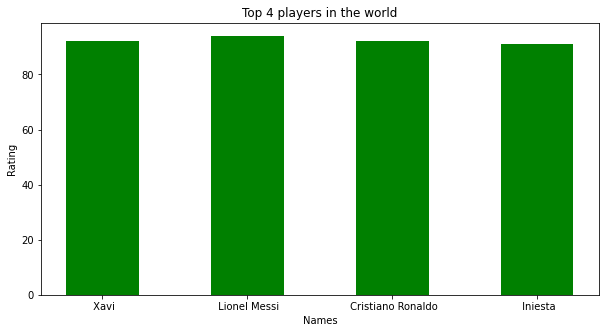

In [35]:
# Dataset generation
courses = tN
values = tR
fig = plt.figure(figsize = (10, 5))
#  Bar plot

plt.bar(courses, values, color ='green',
        width = 0.5)
plt.xlabel("Names")
plt.ylabel("Rating")
plt.title("Top 4 players in the world")
plt.show()

What does all top player have skills wise to be here

In [36]:
topPlayers.describe()

,rating,height,rare,positioning
count,4.000000,4.000000,4.0,0.0
mean,92.250000,173.750000,1.0,NaN
std,1.258306,8.180261,0.0,NaN
min,91.000000,169.000000,1.0,NaN
25%,91.750000,169.750000,1.0,NaN
50%,92.000000,170.000000,1.0,NaN
75%,92.500000,174.000000,1.0,NaN
max,94.000000,186.000000,1.0,NaN


## Question 3 Does height of the goalkeeper (GK) effect diving.

In [6]:
gk = fifa[fifa[' position'] == ' GK']

In [7]:
gk.head()

,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
id,,,,,,,,,,,,,,,,,,
1001,Gábor Király,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
100745,Paul Smith,64,GK,193,Right,1,,,,,,,65,62,55,67,41,62.0
100807,Stefanos Kotsolis,65,GK,190,Right,0,,,,,,,62,68,62,65,60,64.0
100899,Steve Phillips,61,GK,185,Right,1,,,,,,,46,65,76,71,31,61.0
101282,Oka Nikolov,70,GK,188,Right,0,,,,,,,72,64,59,73,61,73.0


In [8]:
gkheight = gk[' height']
print(gkheight)

id
1001      191
100745    193
100807    190
100899    185
101282    188
         ... 
806       191
8247      184
8910      182
899       194
9751      196
Name:  height, Length: 930, dtype: int64


In [9]:
gkdiving = gk[' diving']
print(gkdiving)

id
1001       70
100745     65
100807     62
100899     46
101282     72
         ... 
806        71
8247       78
8910       60
899        72
9751       70
Name:  diving, Length: 930, dtype: object


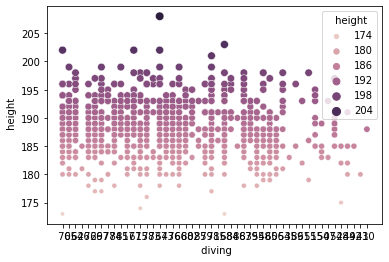

In [41]:
import seaborn as sns
sns.scatterplot(x=gkdiving, y=gkheight, 
                hue= gkheight ,size= gkheight, data=fifa)

In [10]:
gk.describe()

,rating,height,rare,positioning
count,930.00000,930.000000,930.000000,930.000000
mean,65.91828,188.233333,0.345161,64.955914
std,7.67349,4.701690,0.475677,8.854231
min,40.00000,173.000000,0.000000,37.000000
25%,61.00000,185.000000,0.000000,59.000000
50%,66.00000,188.000000,0.000000,65.000000
75%,71.00000,191.000000,1.000000,71.000000
max,89.00000,208.000000,1.000000,91.000000


In [11]:
gkdiving.describe()

count     930
unique     48
top        65
freq       51
Name:  diving, dtype: object

In [12]:
gkheight.describe()

count    930.000000
mean     188.233333
std        4.701690
min      173.000000
25%      185.000000
50%      188.000000
75%      191.000000
max      208.000000
Name:  height, dtype: float64

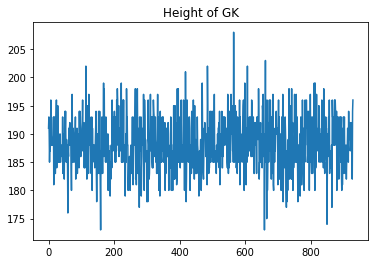

In [42]:
import numpy as np
from matplotlib import pyplot as plt

ys = gkheight
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Height of GK")
plt.show()

## Question 4 What more common left foot or right foot?

In [13]:
#QUESTION 1
rightfoot = fifa.loc[fifa[" foot"] == ' Right']
leftfoot = fifa.loc[fifa[" foot"] == ' Left']

In [ ]:
foot.describe()

count       8847
unique         2
top        Right
freq        6762
Name:  foot, dtype: object

In [15]:
rightfoot.head()


,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
id,,,,,,,,,,,,,,,,,,
1001,Gábor Király,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN
100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,,,,,,NaN
100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,,,,,,NaN
100329,Abdoulaye Faye,72,D,187,Right,1,50,37,47,43,76,82,,,,,,NaN


In [17]:
rightfoot.describe()

,rating,height,rare,positioning
count,6762.000000,6762.000000,6762.000000,832.000000
mean,66.588287,182.008429,0.354629,64.757212
std,7.249946,6.449908,0.478436,8.816962
min,40.000000,158.000000,0.000000,37.000000
25%,62.000000,178.000000,0.000000,59.000000
50%,66.000000,182.000000,0.000000,65.000000
75%,72.000000,186.000000,1.000000,71.000000
max,92.000000,208.000000,1.000000,91.000000


In [16]:
leftfoot.head()

,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
id,,,,,,,,,,,,,,,,,,
100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,,,,,,NaN
100522,Dominic Foley,62,A,186,Left,1,34,65,55,55,56,77,,,,,,NaN
100557,Brian Barry-Murphy,60,M,185,Left,0,61,54,60,47,60,48,,,,,,NaN
100756,Stephen Hunt,56,D,185,Left,0,67,32,46,46,59,63,,,,,,NaN
100758,Jay Tabb,63,M,170,Left,1,69,58,66,65,59,66,,,,,,NaN


In [18]:
leftfoot.describe()

,rating,height,rare,positioning
count,2085.000000,2085.000000,2085.000000,98.000000
mean,66.979376,180.913669,0.348201,66.642857
std,6.794068,6.399093,0.476515,9.035155
min,43.000000,160.000000,0.000000,46.000000
25%,62.000000,176.000000,0.000000,61.000000
50%,67.000000,181.000000,0.000000,67.000000
75%,72.000000,185.000000,1.000000,72.000000
max,94.000000,203.000000,1.000000,87.000000


In [ ]:
#QUESTION 1
RF = foot == ' Right' 
print(RF)

id
1001       True
100143     True
100264     True
100325    False
100326     True
          ...  
9801      False
9805       True
9807       True
9815       True
9913       True
Name:  foot, Length: 8847, dtype: bool


In [ ]:
LF = foot == ' Left'
print(LF)

id
1001      False
100143    False
100264    False
100325     True
100326    False
          ...  
9801       True
9805      False
9807      False
9815      False
9913      False
Name:  foot, Length: 8847, dtype: bool


In [ ]:
TLF = LF == True
print(TLF)

id
1001      False
100143    False
100264    False
100325     True
100326    False
          ...  
9801       True
9805      False
9807      False
9815      False
9913      False
Name:  foot, Length: 8847, dtype: bool


In [62]:
foot_count = fifa[' foot'].value_counts().reset_index().set_index('index').head(20).rename(columns={' foot': 'Count'})
foot_count

,Count
index,
Right,6762
Left,2085


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


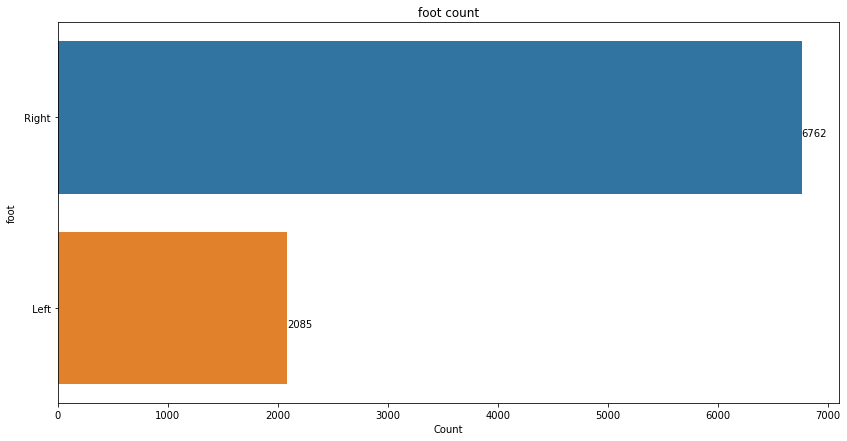

In [63]:
fig, ax = plt.subplots(figsize=(14,7))

sns.barplot(foot_count['Count'], foot_count.index)
for i,j in enumerate(foot_count['Count']):
    ax.text(j, i+0.1, str(j))
    

plt.xlabel('Count')
plt.ylabel('foot')
plt.title('foot count')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


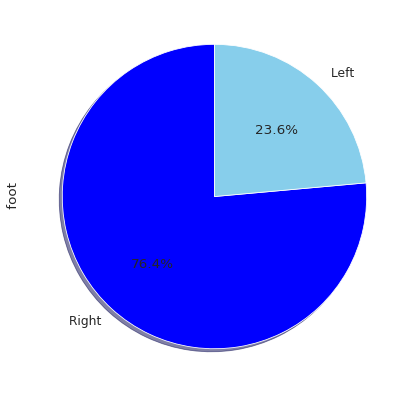

In [74]:
foot_overall = pd.DataFrame(columns = [' name',' foot',' rating'])
foot_overall[' foot'] = fifa[' foot']
foot_overall.Overall = rating
foot_overall.Name = name
colors = ['blue','skyblue']
foot_overall[' foot'].value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f%%',shadow=True, startangle=90,
                                             colors=colors)
plt.show()

## Question 5 What is Position Based Distribution

In [64]:
fifa[' position'].unique()

array([' GK', ' M', ' A', ' D'], dtype=object)

In [65]:
fifa[' position'].value_counts()

 M     3041
 D     2794
 A     2082
 GK     930
Name:  position, dtype: int64

In [67]:
Midfielders = [" M"]
Defence = [" D" ]
Forwards= [" A"]
Goalkeepers = [' GK']
conditions = [(fifa[' position'].isin(Midfielders)),
              (fifa[' position'].isin(Defence)),
              (fifa[' position'].isin(Forwards)),
              (fifa[' position'].isin(Goalkeepers))]

values = ['Midfielders', 'Defence', 'Forwards', 'Goalkeepers']
fifa['Category'] = np.select(conditions, values)

In [69]:
fifa['Category'].value_counts()

Midfielders    3041
Defence        2794
Forwards       2082
Goalkeepers     930
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


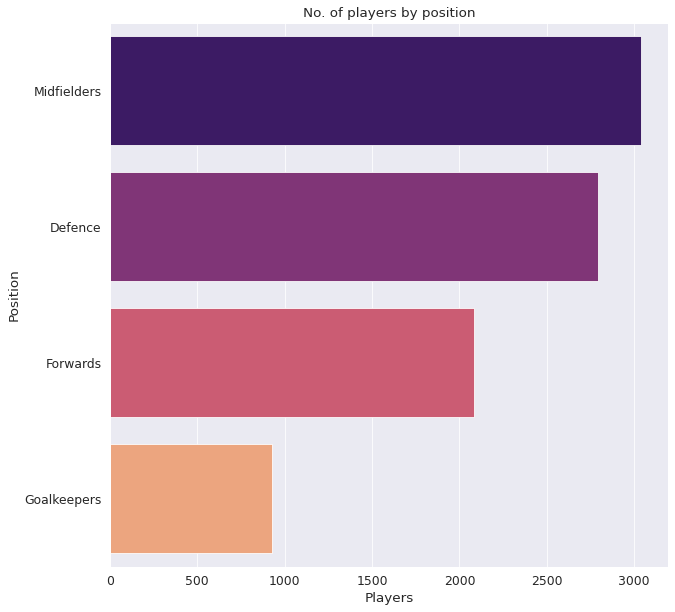

In [70]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.4)
cat_count = fifa['Category'].value_counts()
plt.figure(figsize=(10, 10))
sns.barplot(cat_count.values, cat_count.index, palette="magma")
plt.title('No. of players by position')
plt.ylabel('Position')
plt.xlabel('Players')

plt.show()

## Question 6 best players in other stats

In [19]:
fifa.sort_values(by = ' passing' , ascending = False)[[' name',' passing']].head()

,name,passing
id,,
10535,Xavi,92
41,Iniesta,90
162895,Cesc Fàbregas,89
13743,Steven Gerrard,88
139869,Wesley Sneijder,88


In [20]:
fifa.sort_values(by = ' shooting' , ascending = False)[[' name',' shooting']].head()

,name,shooting
id,,
20801,Cristiano Ronaldo,90
7826,Robin van Persie,89
113422,David Villa,89
41236,Zlatan Ibrahimović,89
54050,Wayne Rooney,88


In [21]:
fifa.sort_values(by = ' defending' , ascending = False)[[' name',' defending']].head()

,name,defending
id,,
140601,Nemanja Vidić,89
13038,Puyol,88
13732,John Terry,87
23461,Walter Samuel,87
46815,Brede Hangeland,86


In [22]:
fifa.sort_values(by = ' heading' , ascending = False)[[' name',' heading']].head()

,name,heading
id,,
51412,Tim Cahill,91
140601,Nemanja Vidić,91
106231,Aduriz,91
155862,Sergio Ramos,90
138110,Bruno Alves,89
